# Ensembling

<b> what is Ensembling ? </b>  <br>it is a algorithm or a way of connecting a few learners / algorithms / weak learners to make a powerful model that is aggregation of all models that is one way or other ( in direct ways , in indirect ways ). Other ways of stating is that coupling a few weak learners and creating a new model that is strong learners. 

## Voting Classifiers

In [130]:
import numpy as np
from math import ceil
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import matplotlib as mpl

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



## Hard Voting

Aggregation of predictor's Output Class

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor

log_reg = LogisticRegression( solver="liblinear" , random_state=43 )
ran_for = RandomForestClassifier( n_estimators=10 , random_state=43 )
svm = SVC( gamma="auto" , random_state=43 )
# dec_tree = DecisionTreeRegressor( max_depth=4 , random_state=43 ) is not working

voting = VotingClassifier(
                estimators=[ ('log_reg',log_reg) , ('ran_for',ran_for) , ('svm',svm) ],
                voting='hard'
                ) 

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=43,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ran_for',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     crit...
                                        

In [45]:

for clf in  ( log_reg , ran_for , svm ,  voting ):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    name = clf.__class__.__name__
    print(name)
    score = accuracy_score( y_test , y_pred )
    print( score )

LogisticRegression
0.864
RandomForestClassifier
0.88
SVC
0.888
VotingClassifier
0.888


## Soft Voting

Uses Output Probabilities


In [48]:
log_reg = LogisticRegression( solver="liblinear" , random_state=43 )
ran_for = RandomForestClassifier( n_estimators=10 , random_state=43 )
svm = SVC( gamma="auto" , probability=True , random_state=43 )
# dec_tree = DecisionTreeRegressor( max_depth=4 , random_state=43 )

voting = VotingClassifier(
                estimators=[ ('log_reg',log_reg) , ('ran_for',ran_for) , ('svm',svm) ],
                voting='soft'
                ) 

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=43,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('ran_for',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     crit...
                                        

In [56]:
for clf in  ( log_reg , ran_for , svm ,  voting ):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    name = clf.__class__.__name__
    print(name)
    score = accuracy_score( y_pred , y_test )
    print( score )

LogisticRegression
0.864
RandomForestClassifier
0.88
SVC
0.888
VotingClassifier
0.896


# Bagging Ensembling


In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=43)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Accuracy is ',accuracy_score(y_pred , y_test) )

Accuracy is  0.904


In [64]:
dt_cls = DecisionTreeClassifier(max_depth=4,random_state=43)
dt_cls.fit(X_train , y_train)
y_pred = dt_cls.predict(X_test)
print('Accuracy is ',accuracy_score(y_pred , y_test) )

Accuracy is  0.872


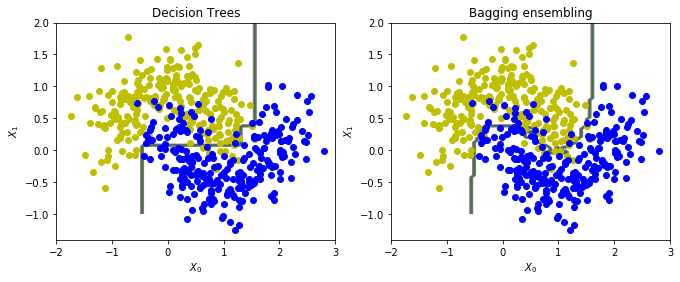

In [98]:
axes = [ 
         round(np.amin(X[:,0])-0.25), 
         round(np.amax(X[:,0])+0.25),
         round(np.amin(X[:,1])-0.25),
         round(np.amax(X[:,1])+0.25)
       ]

x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)
    
X_new = np.c_[x1.ravel(), x2.ravel()]

y_pred = dt_cls.predict(X_new).reshape(x1.shape)

custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])

plt.figure(figsize=(11,4))

plt.subplot(121)

plt.contour(x1, x2, y_pred, cmap=custom_cmap , alpha=0.8)

plt.plot(X[:,0][y==0] , X[:,1][y==0] , 'yo')
plt.plot(X[:,0][y==1] , X[:,1][y==1] , 'bo')

plt.xlabel('$X_{0}$')
plt.ylabel('$X_{1}$')
#plt.legend()
plt.title('Decision Trees')

y_pred = bag_clf.predict(X_new).reshape(x1.shape)

plt.subplot(122)

plt.contour(x1, x2, y_pred, cmap=custom_cmap , alpha=0.8)

plt.plot(X[:,0][y==0] , X[:,1][y==0] , 'yo')
plt.plot(X[:,0][y==1] , X[:,1][y==1] , 'bo')

plt.xlabel('$X_{0}$')
plt.ylabel('$X_{1}$')
#plt.legend()
plt.title('Bagging ensembling')

plt.show()

# Random Forest

In [104]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

print('Accuracy is ',accuracy_score(y_pred,y_test) )

Accuracy is  0.92


In [105]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print('Accuracy is ',accuracy_score(y_pred_rf,y_test) )

Accuracy is  0.912


In [106]:
accuracy_score(y_pred,y_pred_rf)

0.976

In [108]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


# Out of Bag : Evaluation

In [114]:

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

# Feature Importance

In [116]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [118]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [133]:
def plot_digit(data):
    image = data.reshape(28, 28)
    # print(image)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

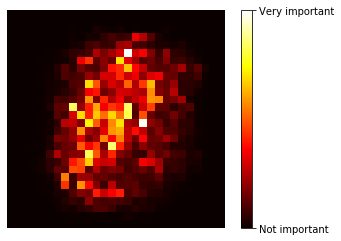

In [134]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

# Adaboost

In [138]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

Text(0.5, 1.0, 'Adaboost Classifier')

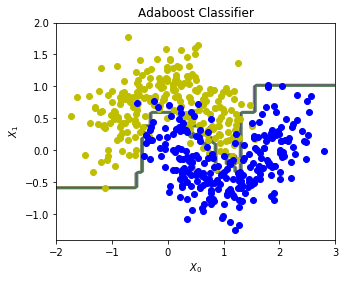

In [140]:
axes = [ 
         round(np.amin(X[:,0])-0.25), 
         round(np.amax(X[:,0])+0.25),
         round(np.amin(X[:,1])-0.25),
         round(np.amax(X[:,1])+0.25)
       ]

x1s = np.linspace(axes[0], axes[1], 100)
x2s = np.linspace(axes[2], axes[3], 100)

x1, x2 = np.meshgrid(x1s, x2s)
    
X_new = np.c_[x1.ravel(), x2.ravel()]

y_pred = ada_clf.predict(X_new).reshape(x1.shape)

custom_cmap = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])

plt.figure(figsize=(11,4))

plt.subplot(121)

plt.contour(x1, x2, y_pred, cmap=custom_cmap , alpha=0.8)

plt.plot(X[:,0][y==0] , X[:,1][y==0] , 'yo')
plt.plot(X[:,0][y==1] , X[:,1][y==1] , 'bo')

plt.xlabel('$X_{0}$')
plt.ylabel('$X_{1}$')
#plt.legend()
plt.title('Adaboost Classifier')


In [ ]:
m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

save_fig("boosting_plot")
plt.show()